<a href="https://www.kaggle.com/code/devikasanthosh04/iris-flower-dataset-decision-tree?scriptVersionId=149047416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
features = df.drop(['species'],axis=1)
features.shape

(150, 4)

# Data Visualization
Since our target variable, 'species,' has multiple classes (e.g., 'setosa,' 'versicolor,' and 'virginica'), creating a scatter plot directly against the target variable may not be the most suitable visualization. Scatter plots are typically used for continuous variables against one another and are not well-suited for categorical target variables with multiple classes.
Box plots are excellent tools for visualizing the distribution of data and identifying potential patterns and outliers within the data. So here I am using box plots.

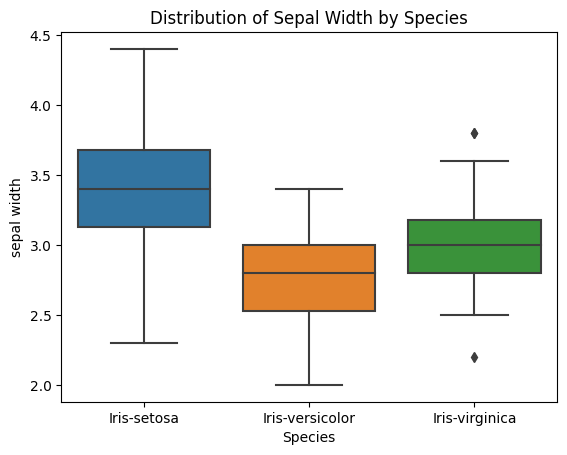

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot for sepal length by species
sns.boxplot(x='species', y='sepal_width', data=df)
plt.xlabel('Species')
plt.ylabel('sepal width')
plt.title('Distribution of Sepal Width by Species')
plt.show()


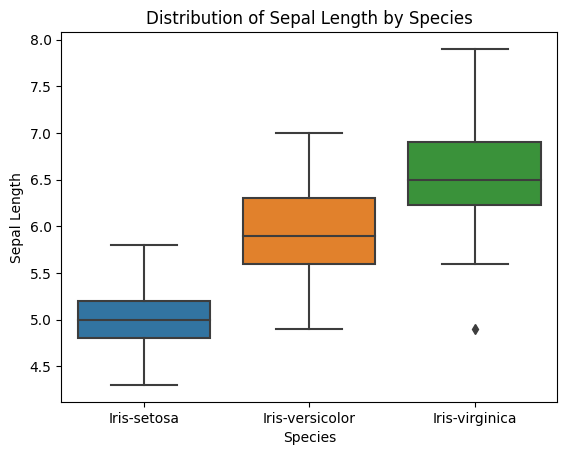

In [5]:
sns.boxplot(x='species', y='sepal_length', data=df)
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Distribution of Sepal Length by Species')
plt.show()

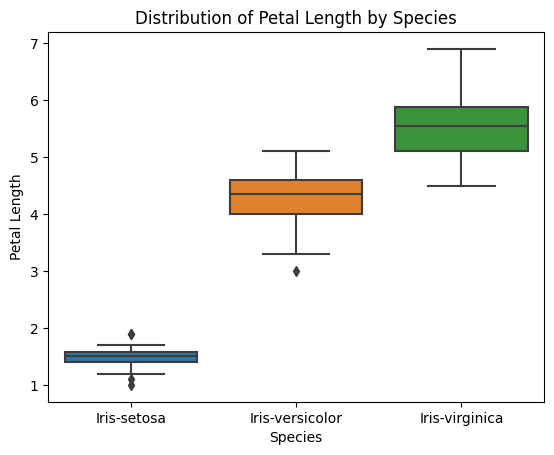

In [6]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Distribution of Petal Length by Species')
plt.show()

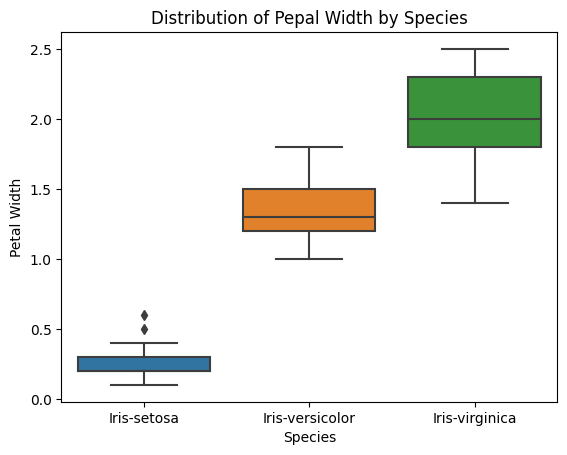

In [7]:
sns.boxplot(x='species', y='petal_width', data=df)
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Distribution of Pepal Width by Species')
plt.show()

# Setting up the Decision Tree
We will be using **train/test split** on our decision tree. **Let's import train_test_split from sklearn.cross_validation.**

Now train_test_split will return 4 different parameters. We will name them:
x_trainset, x_testset, y_trainset, y_testset

The train_test_split will need the parameters:
x, y, test_size=0.3, and random_state=3.

The x and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [8]:
from sklearn.model_selection import train_test_split
x=features
y=df['species']
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

Print the shape of x_trainset and y_trainset. Ensure that the dimensions match.

In [9]:
print('Shape of x training set {}'.format(x_trainset.shape),'&',' Size of y training set {}'.format(y_trainset.shape))

Shape of x training set (105, 4) &  Size of y training set (105,)


In [10]:
print('Shape of X training set {}'.format(x_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (45, 4) &  Size of Y training set (45,)


# Modeling
We will first create an instance of the DecisionTreeClassifier called irisTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [11]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
irisTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
irisTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix x_trainset and training response vector y_trainset

In [12]:
irisTree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Prediction
Let's make some predictions on the testing dataset and store it into a variable called predTree.
We can print out predTree and y_testset if you want to visually compare the predictions to the actual values.

In [13]:
predTree = irisTree.predict(x_testset)
print (predTree [0:5])
print (y_testset [0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
47    Iris-setosa
3     Iris-setosa
31    Iris-setosa
25    Iris-setosa
15    Iris-setosa
Name: species, dtype: object


# Evaluation
Next, let's import metrics from sklearn and check the accuracy of our model.

In [14]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9555555555555556


Accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0

Let's visualize the Tree now..

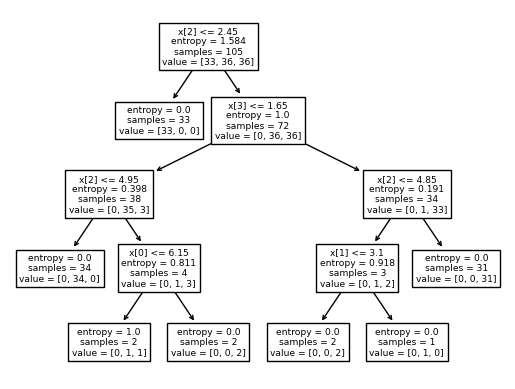

In [15]:
tree.plot_tree(irisTree)
plt.show()

An accuracy score of 0.9111 indicates that the model correctly predicted approximately 91.11% of the data points in the test set. This means that the model's predictions are accurate for a significant portion of the test data.

# Comparing the accuracy with other models

We have already tested the accuracy of decision tree but let's see which algorithm will be the best fit. I am going to use svm,logistic regression and random forest.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

**Parameter tunning using k fold cross validation**

In [17]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),x_trainset,y_trainset, cv=10)
np.average(scores1)

0.9236363636363638

In [18]:
scores2 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x_trainset,y_trainset, cv=10)
np.average(scores2)

0.9627272727272727

In [19]:
scores3 = cross_val_score(SVC(gamma='auto'),x_trainset,y_trainset, cv=10)
np.average(scores3)

0.9809090909090911

So the model with best performance is the support vector machine.